# Classification

## problem defimition
- predict if a person will suffer with hearing disease

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


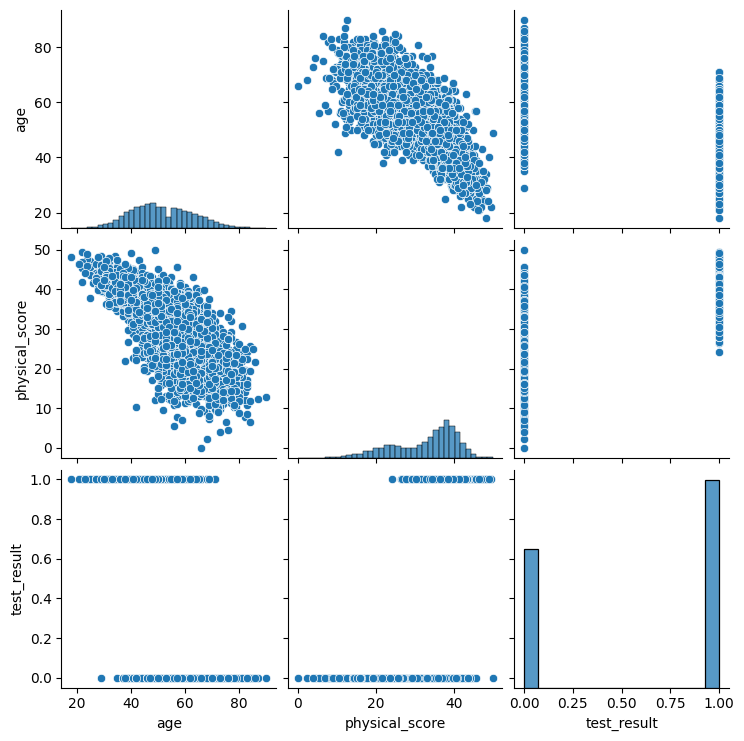

In [6]:
sns.pairplot(df)

In [7]:
df.cov()

,age,physical_score,test_result
age,127.396398,-72.123723,-3.777956
physical_score,-72.123723,66.745660,3.173059
test_result,-3.777956,3.173059,0.240048


In [8]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


### pre-processing data

In [9]:
# split the data into x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [10]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the model

In [11]:
from sklearn.linear_model import LogisticRegression

# create a model
model = LogisticRegression(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### model understanding

In [12]:
# get the probabilities
model.predict_proba(x_test)

array([[0.03506447, 0.96493553],
       [0.13301182, 0.86698818],
       [0.06916827, 0.93083173],
       ...,
       [0.03923605, 0.96076395],
       [0.04120135, 0.95879865],
       [0.96926963, 0.03073037]])

In [13]:
x_test

,age,physical_score
4158,46.0,38.1
2117,47.0,35.1
3328,49.0,37.0
4813,40.0,37.7
4176,35.0,42.0
...,...,...
4948,45.0,35.6
3009,55.0,29.6
4447,47.0,38.0
1083,49.0,38.2


### model evaluation

In [18]:
y_pred = model.predict(x_test)
y_true = y_test

#### confusion matrix

In [19]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[500,  85],
       [ 46, 869]])

In [20]:
tn, fp, fn, tp = cm.ravel()
print(f"tp = {tp}, tn = {tn}, fn = {fn}, fp = {fp}")

tp = 869, tn = 500, fn = 46, fp = 85


#### accuracy

In [21]:
accuracy = (tp + tn) / (tp + tn + fn + fp)
accuracy

0.9126666666666666

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9126666666666666

In [23]:
model.score(x_test, y_test)

0.9126666666666666

#### precision

In [24]:
positive_precision = tp / (tp + fp)
positive_precision

0.910901467505241

In [25]:
negative_precision = tn / (tn + fn)
negative_precision

0.9157509157509157

In [26]:
from sklearn.metrics import precision_score

# calcuate the positive precision
precision = precision_score(y_true, y_pred)
precision

0.910901467505241

#### recall

In [27]:
positive_recall = tp / (tp + fn)
positive_recall

0.9497267759562842

In [28]:
negative_reacll = tn / (tn + fp)
negative_reacll

0.8547008547008547

In [29]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
recall

0.9497267759562842

### F1 score

In [30]:
f1_positive = 2 * ((precision * recall) / (precision + recall))
f1_positive

0.9299090422685928

In [31]:
f1_negative = 2 * ((negative_precision * negative_reacll) / (negative_precision + negative_reacll))
f1_negative

0.8841732979664014

In [32]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
f1

0.9299090422685928

#### classification report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       585
           1       0.91      0.95      0.93       915

    accuracy                           0.91      1500
   macro avg       0.91      0.90      0.91      1500
weighted avg       0.91      0.91      0.91      1500



### Auc RoC

In [34]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_true, y_pred)
score

0.9022138153285694

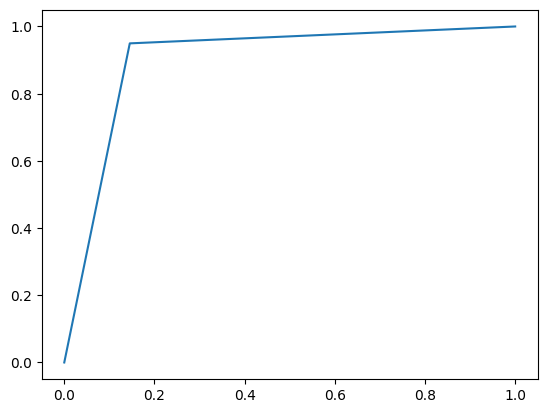

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.plot(fpr, tpr)

### result visualization

- in regression example, we put independent variable on X and dependent variable on Y
- in case of classiciation, we put one independent on X and another independent variable on Y
- and use the dependent variable for classifying the records

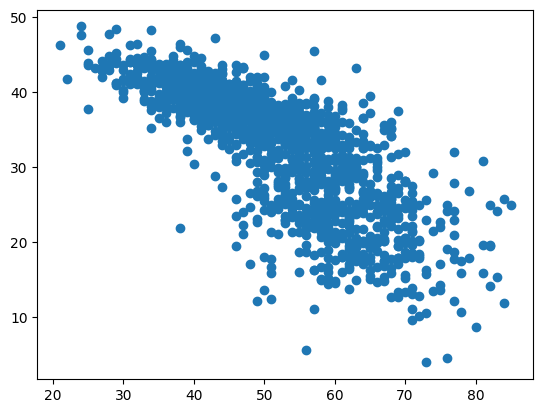

In [37]:
plt.scatter(x_test['age'], x_test['physical_score'])

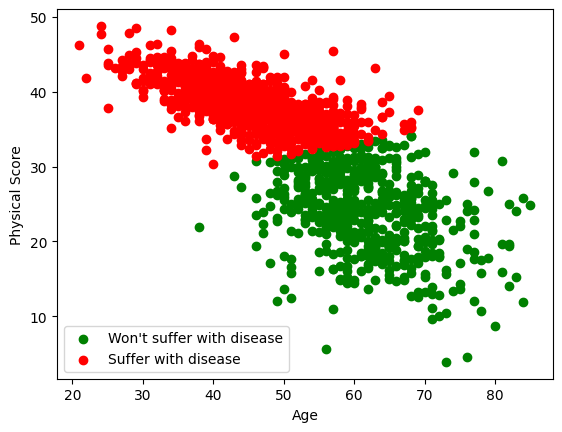

In [48]:
# plot all the users having y_pred as 0
plt.scatter(
        x_test['age'][y_pred == 0], 
        x_test['physical_score'][y_pred == 0], 
        color="green", 
        label="Won't suffer with disease")
plt.scatter(
        x_test['age'][y_pred == 1], 
        x_test['physical_score'][y_pred == 1], 
        color="red", 
        label="Suffer with disease")

plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.legend()

In [42]:
numbers = np.array([10, 20, 30, 40])
# numbers[[True, False, True, False]]
numbers[numbers > 20]

array([30, 40])

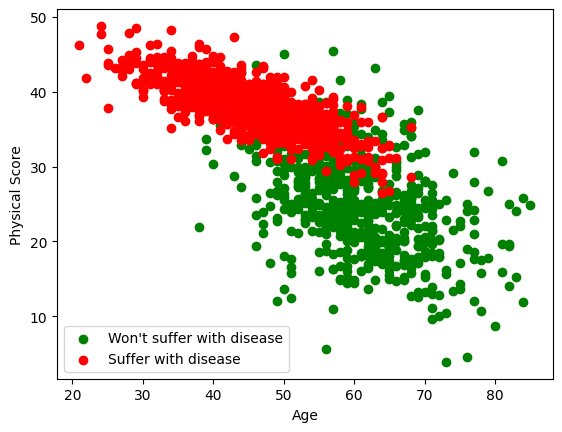

In [49]:
# plot all the users having y_pred as 0
plt.scatter(
        x_test['age'][y_true == 0], 
        x_test['physical_score'][y_true == 0], 
        color="green", 
        label="Won't suffer with disease")
plt.scatter(
        x_test['age'][y_true == 1], 
        x_test['physical_score'][y_true == 1], 
        color="red", 
        label="Suffer with disease")

plt.xlabel("Age")
plt.ylabel("Physical Score")
plt.legend()